In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import display, Math, Latex
import math
pi=math.pi
import cmath

#import scipy
from scipy import special

In [2]:
D=2e-6
rho_p=1040
rho_f=998
k=11.478e-6
R=D/2.
kB=1.381e-23
deltaT=10
T0=293.15
eta=2.414e-5*10**(247.8/(T0-140))
rho_f=0.14395/(0.0112**(1+(1-T0/649.727)**0.05107))
drag=6*pi*eta*R
Diff_const=kB*T0/drag
V_p=4/3.*pi*R**3
M_p=rho_p*V_p
M_f=rho_f*V_p
M_eff=M_p+M_f/2
tau_p=M_p/(6*pi*eta*R)
tau_f=R**2*rho_f/eta
tau_k=drag/k
f_p=1/(2*pi*tau_p)
f_f=1/(2*pi*tau_f)
f_k=1/(2*pi*tau_k)

eta_inf = 0.02984e-3
T_VF = 152
theta = deltaT/(T0-T_VF)

#Thot=T0+deltaT
Thot=T0+5/12*deltaT+math.log(eta/eta_inf)/(22*(T0+deltaT-T_VF))*deltaT**2
etahot=2.414e-5*10**(247.8/(Thot-140))
rho_fhot=0.14395/(0.0112**(1+(1-Thot/649.727)**0.05107))
draghot=6*pi*etahot*R
#Diff_consthot=kB*Thot/drag
M_fhot=rho_fhot*V_p
M_effhot=M_p+M_fhot/2
tau_phot=M_p/(6*pi*etahot*R)
tau_fhot=R**2*rho_fhot/etahot
tau_khot=draghot/k
f_phot=1/(2*pi*tau_phot)
f_fhot=1/(2*pi*tau_fhot)
f_khot=1/(2*pi*tau_khot)

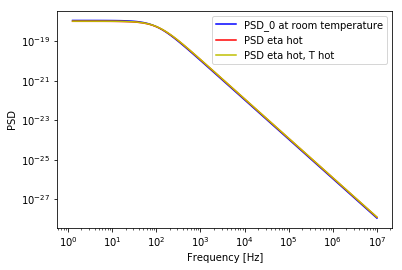

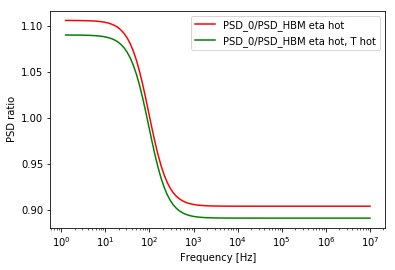

In [59]:
f = np.logspace(1e-1,7,num=100)
f_c = k/(2*pi*drag)
f_chot = k/(2*pi*draghot)

#PSD at room temperature
def PSDtrapcold(f):
    return kB*T0/(2*pi**2*drag*(f_c**2+f**2))

#PSD of a heated particle
def PSDtraphot(f):
    return kB*T0/(2*pi**2*draghot*(f_chot**2+f**2))

#PSD of a heated particle
def PSDtraphot2(f):
    return kB*Thot/(2*pi**2*draghot*(f_chot**2+f**2))

plt.loglog(f, PSDtrapcold(f),'b',label='PSD_0 at room temperature')
plt.loglog(f, PSDtraphot(f),'r',label='PSD eta hot')
plt.loglog(f, PSDtraphot2(f),'y',label='PSD eta hot, T hot')

plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.legend()
plt.show()

deltaPSDtrap=PSDtrapcold(f)/PSDtraphot(f)
deltaPSDtrap2=PSDtrapcold(f)/PSDtraphot2(f)

plt.semilogx(f, deltaPSDtrap,'r',label='PSD_0/PSD_HBM eta hot')
plt.semilogx(f, deltaPSDtrap2,'g',label='PSD_0/PSD_HBM eta hot, T hot')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD ratio')
plt.legend()
plt.show()

In [60]:
%%latex
\begin{align}
\rm{PSD}_{0} &=& \frac{k_{B}T}{2 \pi ^{2}\beta \left ( f_{c}^{2}+f^{2} \right )} \\
\rm{PSD}_{\eta_{\rm{hot}}}&=&\frac{k_{B}T}{2\pi ^{2}\beta_{\rm{HBM}} \left ( f_{\rm{c,\: HBM}}^{2}+f^{2} \right )} \\
\rm{PSD}_{\eta_{\rm{hot}},T_{\rm{HBM}}}&=&\frac{k_{B}T_{\rm{HBM}}}{2\pi ^{2}\beta_{\rm{HBM}} \left ( f_{\rm{c,\: HBM}}^{2}+f^{2} \right )}
\end{align}

<IPython.core.display.Latex object>

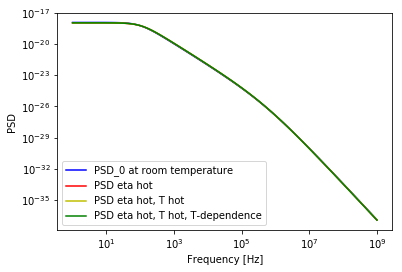

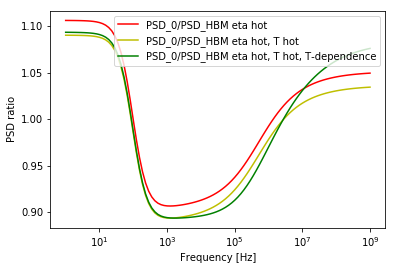

In [61]:
f = np.logspace(0,9,num=100)

#PSD at room temperature
def PSDcold(f):
    return kB*T0/(2*pi**2*drag*f**2)*(1+np.sqrt(f/(2*f_f)))/((f_k/f-np.sqrt(f/(2*f_f))-f/f_p-f/(9*f_f))**2+(1+np.sqrt(f/(2*f_f)))**2)

#PSD of a heated particle
def PSDhot(f):
    return kB*T0/(2*pi**2*draghot*f**2)*(1+np.sqrt(f/(2*f_fhot)))/((f_khot/f-np.sqrt(f/(2*f_fhot))-f/f_phot-f/(9*f_fhot))**2+(1+np.sqrt(f/(2*f_fhot)))**2)

#PSD of a heated particle
def PSDhot2(f):
    return kB*Thot/(2*pi**2*draghot*f**2)*(1+np.sqrt(f/(2*f_fhot)))/((f_khot/f-np.sqrt(f/(2*f_fhot))-f/f_phot-f/(9*f_fhot))**2+(1+np.sqrt(f/(2*f_fhot)))**2)

PSDhotT = np.zeros(100)
deltaPSD3 = np.zeros(100)
#PSD of a heated particle
for i in range(100):
    fre=f[i]
    T_omega=(3.2835e-4/((1/fre)**0.49039+5.5911e-4)+0.41594)*deltaT+T0
    eta_t=2.414e-5*10**(247.8/(T_omega-140))
    drag_t=6*pi*eta_t*R
    rho_f_t=0.14395/(0.0112**(1+(1-T_omega/649.727)**0.05107))
    tau_p_t=M_p/(6*pi*eta_t*R)
    tau_f_t=R**2*rho_f_t/eta_t
    tau_k_t=drag_t/k
    f_p_t=1/(2*pi*tau_p_t)
    f_f_t=1/(2*pi*tau_f_t)
    f_k_t=1/(2*pi*tau_khot)
    PSDhotT[i]=kB*T_omega/(2*pi**2*drag_t*fre**2)*(1+np.sqrt(fre/(2*f_f_t)))/((f_k_t/fre-np.sqrt(fre/(2*f_f_t))-fre/f_p_t-fre/(9*f_f_t))**2+(1+np.sqrt(fre/(2*f_f_t)))**2)
    deltaPSD3[i]=PSDcold(fre)/PSDhotT[i]
    
plt.loglog(f, PSDcold(f),'b',label='PSD_0 at room temperature')
plt.loglog(f, PSDhot(f),'r',label='PSD eta hot')
plt.loglog(f, PSDhot2(f),'y',label='PSD eta hot, T hot')
plt.loglog(f, PSDhotT,'g',label='PSD eta hot, T hot, T-dependence')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.legend()
plt.show()

deltaPSD=PSDcold(f)/PSDhot(f)
deltaPSD2=PSDcold(f)/PSDtrap2(f)

plt.semilogx(f, deltaPSD,'r',label='PSD_0/PSD_HBM eta hot')
plt.semilogx(f, deltaPSD2,'y',label='PSD_0/PSD_HBM eta hot, T hot')
plt.semilogx(f, deltaPSD3,'g',label='PSD_0/PSD_HBM eta hot, T hot, T-dependence')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD ratio')
plt.legend()
plt.show()